<a href="https://colab.research.google.com/github/Lukaid/my_notebook/blob/main/%ED%86%A0%ED%94%BD_%EB%AA%A8%EB%8D%B8%EB%A7%81(Topic_Modeling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 토픽 모델링(Topic Modeling)

* 토픽 모델링은 문서 집합에서 주제를 찾아내기 위한 기술
* 토픽 모델링은 '특정 주제에 관한 문서에서는 특정 단어가 자주 등장할 것이다'라는 직관을 기반
* 예를 들어, 주제가 '개'인 문서에서는 개의 품종, 개의 특성을 나타내는 단어가 다른 문서에 비해 많이 등장
* 주로 사용되는 토픽 모델링 방법은 잠재 의미 분석과 잠재 디리클레 할당 기법이 있음

## 잠재 디리클레 할당(Latent Dirichlet Allocation)

* 잠재 디레클레 할당(LDA)은 대표적인 토픽 모델링  알고리즘 중 하나

* 잠재 디레클레 할당 방법
  1. 사용자가 토픽이 개수를 지정해 알고리즘에 전달
  2. 모든 단어들을 토픽 중 하나에 할당
  3. 모든 문서의 모든 단어에 대해 단어 w가 가정에 의거, $p(t|d)$, $p(w|t)$에 따라 토픽을 재할당, 이를 반복, 이 때 가정은 자신만이 잘못된 토픽에 할당되어 있고 다른 모든 단어는 올바른 토픽에 할당된다는 것을 의미    

* $p(t|d)$ - 문서 d의 단어들 중 토픽 t에 해당하는 비율
* 해당 문서의 자주 등장하는 다른 단어의 토픽이 해당 단어의 토픽이 될 가능성이 높음을 의미    

* $p(w|t)$- 단어 w를 가지고 있는 모든 문서들 중  토픽 t가 할당된 비율
* 다른 문서에서 단어 w에 많이 할당된 토픽이 해당 단어의 토픽이 될 가능성이 높음을 의미

## 한국어 자연어 처리 konlpy와 형태소 분석기 MeCab 설치

* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh


- 참고로 아래의 방법은 colab에서만 동작... windows에서 설치하려면 아주 복잡하여 pass...

In [ ]:
!set - x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 460kB 42.2MB/s 
     |████████████████████████████████| 92kB 5.4MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ echo 'Installing automake (A dependency for mecab-ko)'
Installing automake (A dependency for mecab-ko)
+ install_automake
+ '[' Linux == Linux ']'
++ grep -Ei 'debian|buntu|mint' /etc/lsb-release /etc/os-release
+ '[' '/etc/lsb-release:DISTRIB_ID=Ubuntu
/etc/lsb-release:DISTRIB_DESCRIPTION="Ubuntu 18.04.5 LTS"
/etc/os-release:NAME="Ubuntu"
/etc/os-release:ID=ubuntu
/etc/os-release:ID_LIKE=debian
/etc/os-release:PRETT

In [ ]:
import re
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from konlpy.tag import Mecab

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
## for preprocessing
from gensim.parsing.preprocessing import preprocess_string
stop_words = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stop_words_korean.txt')

stop_list = [stop_words.iloc[i]['불용어'] for i in range(len(stop_words))]

def clean_text(data):
    pattern = r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]'
    re.sub(pattern, '', data)
    return data

def clean_stop_words(data):
    return ' '.join([w for w in data if w not in stop_words])

def preprocessing(data):
    return preprocess_string(data)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
review_data_lt = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_lt.csv', encoding='utf-8')

In [ ]:
review_data_lt

,num,date,review,rating,like
0,0,2021년 04월 18일,제품이 싸고 쿠폰도 줘서 자주 구입합니다,3,NaN
1,1,2021년 04월 18일,로그인을 하려면 두 번씩 입력하고 포인트를 선물하려면 계속 조회할 수 없다고 나오네...,2,NaN
2,2,2021년 04월 18일,앱전용혜택도 많네요,5,NaN
3,3,2021년 04월 18일,엘포인트 쓸 수 있어서 넘 좋아요 진짜,5,NaN
4,4,2021년 04월 18일,편리해서 쓰기 좋아~~요 ㅋ,4,NaN
...,...,...,...,...,...
8595,8595,2014년 01월 08일,오호 참좋은 어플이에요,5,NaN
8596,8596,2014년 01월 08일,좋아요 어디서라도 이용할 수 있어 좋고~~전용쿠폰도 유용함 이벤트도 풍성하고 좋아요,5,NaN
8597,8597,2014년 01월 08일,좋아요 롯데다컴앱은 여러가지이벤트와 따로 직접사라가지않아도되는편리함이있어서좋아요,5,NaN
8598,8598,2014년 01월 08일,어플이 완성도가 높네요 쿠폰도 많고 할인율도 높고 정말 괜찮ㅇ 은 앱이에요 진작 사...,5,NaN


In [ ]:
lda_df = review_data_lt['review']
len(lda_df)

8600

In [ ]:
lda_df.replace("", float('NaN'), inplace = True)
lda_df.dropna(inplace = True)
len(lda_df)

8600

In [ ]:
lda_df = lda_df.apply(clean_stop_words)

In [ ]:
lda_df

0             제 품 이   싸 고   쿠 폰 도   줘 서   자 주   구 입 합 니 다
1       로 그 인 을   하 려 면   두   번 씩   입 력 하 고   포 인 트 를 ...
2                                     앱 전 용 혜 택 도   많 네 요
3               엘 포 인 트   쓸   수   있 어 서   넘   좋 아 요   진 짜
4                           편 리 해 서   쓰 기   좋 아 ~ ~ 요   ㅋ
                              ...                        
8595                              오 호   참 좋 은   어 플 이 에 요
8596    좋 아 요   어 디 서 라 도   이 용 할   수   있 어   좋 고 ~ ~ ...
8597    좋 아 요   롯 데 다 컴 앱 은   여 러 가 지 이 벤 트 와   따 로   ...
8598    어 플 이   완 성 도 가   높 네 요   쿠 폰 도   많 고   할 인 율 ...
8599    저 는   주 로   모 바 일 로   주 로   쇼 핑 하 는 데   이 벤 트 ...
Name: review, Length: 8600, dtype: object

In [ ]:
review_data_lt['label'] = np.select([review_data_lt.rating >= 3], [1], default=0)
review_data_lt[:10]

,num,date,review,rating,like,label
0,0,2021년 04월 18일,제품이 싸고 쿠폰도 줘서 자주 구입합니다,3,NaN,1
1,1,2021년 04월 18일,로그인을 하려면 두 번씩 입력하고 포인트를 선물하려면 계속 조회할 수 없다고 나오네...,2,NaN,0
2,2,2021년 04월 18일,앱전용혜택도 많네요,5,NaN,1
3,3,2021년 04월 18일,엘포인트 쓸 수 있어서 넘 좋아요 진짜,5,NaN,1
4,4,2021년 04월 18일,편리해서 쓰기 좋아~~요 ㅋ,4,NaN,1
5,5,2021년 04월 18일,할인쿠폰 더 주세요!!! 짱!!,3,NaN,1
6,6,2021년 04월 18일,신선한 제품 감사드려요~~,5,NaN,1
7,7,2021년 04월 18일,무거운 장바구니를 들 필요가 없네용 ㅎㅎ,5,NaN,1
8,8,2021년 04월 18일,요즘 제일 많이 이용함 ㅎㅎ,3,NaN,1
9,9,2021년 04월 18일,"여러가지 한번에 살 수 있고, 할인쿠폰도 활용할 수 있어 좋아요",5,NaN,1


In [ ]:
review_data_lt['rating'].nunique(), review_data_lt['review'].nunique(), review_data_lt['label'].nunique()

(5, 7951, 2)

In [ ]:
len(review_data_lt)

8600

In [ ]:
review_data_lt.drop_duplicates(subset=['review'], inplace=True)
print(len(review_data_lt))

7951


In [ ]:
review_data_lt['review'] = review_data_lt['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")
review_data_lt['review'].replace("", np.nan, inplace=True)
print(len(review_data_lt))

7951


In [ ]:
review_list = list(review_data_lt.dropna(axis=0)['review'])
print(len(review_data_lt), len(review_list))

7951 2856


In [ ]:
# 형태소분석 - Mecab - pos
mecab = Mecab()
line_list = []

for line in review_list:
    line_list.append(mecab.nouns(line))

print("- 불러온 문서 :", len(line_list), "단어")
print(line_list)

- 불러온 문서 : 2856 단어
[['앱', '롯데', '쇼핑몰', '수', '주문', '결제', '화면', '현상', '고객', '센터', '문의', '캐시', '삭제', '장바구니', '후', '접속', '문의', '이번', '배송지', '삭제', '후', '시간', '후', '접속', '수', '오류', '주문', '오류', '발생', '문제', '시스템', '개선', '소비자', '이것저것', '식', '거', '하나'], ['롯데카드', '롯데', '플', '거', '네이버', '쇼핑', '남음', '우선', '통합', '검색', '이상', '실행', '자동', '플', '실행', '현상', '수정', '삭제', '갤럭시'], ['엘', '포인트', '앱', '업', '롯데', '롯데마트', '때', '로그아웃', '가요', '자동', '로그인', '때', '롯데', '로그인'], ['쿠폰', '하나', '수', '인터넷', '연결', '확인', '화면', '터치', '때', '마다', '뭘', '수', '주문', '수', '회사', '속', '엉망', '말', '앱', '최악', '댓글', '불만', '하루', '이틀', '수정', '건지', '건지', '앱', '장바구니', '상품', '하나', '체크', '때', '마다', '로딩', '짜증', '롯', '데온', '최악'], ['단순', '사이즈', '등', '교환', '반품', '구매', '반품', '불편', '짜증', '기간', '반품', '조건', '해당', '사항', '구매', '배송', '반품', '회수', '수일', '반품', '정산', '수일', '이상', '불안', '여기', '구매'], ['업데이트', '접속', '앱', '모바일', '로', '접속', '와이파이', '로', '건가요', '롯', '롯데마트', '업데이트', '접속', '업데이트'], ['로그인', '오류', '분', '밑', '저', '경우', '리뷰', '저', '작년', '상황', '지내', '줄', '제

In [ ]:
word_frequency = {}
noun_list = []
#불용어 리스트위에서 추가
line_number = 0
for line in line_list[:]:
    line_number += 1
    print(str(line_number) + "/" + str(len(line_list)), end="\r")
    noun = []
    for word in line:
        if word.split("/")[0] not in stop_list and len(word.split("/")[0]) > 1:  
            noun.append(word.split("/")[0])
            if word not in word_frequency.keys():
                word_frequency[word] = 1
            else:
                word_frequency[word] += 1
    noun_list.extend(noun)

In [ ]:
#단어별 출현빈도를 출력합니다.
word_count = []
for n, freq in word_frequency.items():
    word_count.append([n, freq])
word_count.sort(key=lambda elem: elem[1], reverse=True)
for n, freq in word_count[:10]:
    print(n + "\t" + str(freq))

롯데	1029
상품	555
닷컴	539
검색	538
불편	390
사용	366
로그인	356
쇼핑	351
오류	311
업데이트	287


In [ ]:
import gensim
from gensim import corpora
import logging
logging.basicConfig(level=logging.DEBUG)
topic = 5
keyword = 10
texts = []
resultList = []
for line in line_list:
    words = line
    if words != [""]:
        tokens = [word for word in words if (len(word.split("/")[0]) > 1 and word.split("/")[0] not in stop_list)]
        texts.append(tokens)
dictionary = corpora.Dictionary(texts)    
corpus = [dictionary.doc2bow(text) for text in texts]

ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=topic, id2word = dictionary, passes=10)
for num in range(topic):
    resultList.append(ldamodel.show_topic(num, keyword))

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(2640 unique tokens: ['개선', '결제', '고객', '롯데', '문의']...) from 2856 documents (total 23938 corpus positions)
INFO:gensim.models.ldamodel:using symmetric alpha at 0.2
INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (multi-pass) LDA training, 5 topics, 10 passes over the supplied corpus of 2856 documents, updating model once every 2000 documents, evaluating perplexity every 2856 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #2000/2856
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 2000 documents
DEBUG:gensim.models.ldamodel:1660/2000 documents converged within 50 iterations
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging

In [ ]:
resultList

[[('실행', 0.027216574),
  ('쿠폰', 0.022040881),
  ('종료', 0.021329671),
  ('주문', 0.019175645),
  ('오류', 0.01705882),
  ('고객', 0.01576702),
  ('롯데', 0.01541376),
  ('설치', 0.014891238),
  ('에러', 0.012229994),
  ('쓰레기', 0.011067415)],
 [('롯데', 0.053597365),
  ('닷컴', 0.027577983),
  ('모바일', 0.02646754),
  ('결제', 0.023543118),
  ('구매', 0.01948684),
  ('배송', 0.019420108),
  ('쇼핑', 0.01923449),
  ('상품', 0.01861128),
  ('이벤트', 0.016532334),
  ('쿠폰', 0.015229543)],
 [('롯데', 0.063245766),
  ('검색', 0.04401079),
  ('닷컴', 0.042461935),
  ('상품', 0.03329312),
  ('쇼핑', 0.026115602),
  ('불편', 0.022252116),
  ('이용', 0.019205464),
  ('등급', 0.017307682),
  ('편리', 0.016311526),
  ('사용', 0.01586155)],
 [('로그인', 0.09046188),
  ('비번', 0.022019323),
  ('번호', 0.021972058),
  ('짜증', 0.020065399),
  ('오류', 0.018692844),
  ('설치', 0.017410878),
  ('가입', 0.017068468),
  ('삭제', 0.016476315),
  ('쇼핑', 0.016374188),
  ('주문', 0.0154400645)],
 [('업데이트', 0.04996448),
  ('사용', 0.041398656),
  ('상품', 0.034687966),
  ('오류', 0.0

In [ ]:
from gensim.models import LdaModel

lda_model = LdaModel(corpus, num_topics = 5, id2word = dictionary)
topics = lda_model.print_topics()
topics

INFO:gensim.models.ldamodel:using symmetric alpha at 0.2
INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 2856 documents, updating model once every 2000 documents, evaluating perplexity every 2856 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #2000/2856
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 2000 documents
DEBUG:gensim.models.ldamodel:1672/2000 documents converged within 50 iterations
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 2000 documents into a model of 2856 documents
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.063*"롯데" + 0.045*"상품" + 0.041*"검색" + 0.027*"닷컴" + 0.022*"불편" + 0.016*"이용" + 0.014*"짜증" + 0.013*"쇼핑" + 0.011*"배송" + 0.010*"사용"
INFO:

[(0,
  '0.051*"상품" + 0.050*"롯데" + 0.031*"검색" + 0.030*"닷컴" + 0.029*"쇼핑" + 0.016*"짜증" + 0.014*"이용" + 0.014*"불편" + 0.013*"개선" + 0.012*"구매"'),
 (1,
  '0.041*"롯데" + 0.038*"오류" + 0.033*"닷컴" + 0.031*"업데이트" + 0.018*"사용" + 0.014*"불편" + 0.013*"쇼핑" + 0.013*"인터넷" + 0.013*"화면" + 0.013*"검색"'),
 (2,
  '0.031*"롯데" + 0.017*"물건" + 0.013*"화면" + 0.012*"닷컴" + 0.011*"번호" + 0.011*"불편" + 0.011*"결제" + 0.010*"주문" + 0.010*"상품" + 0.010*"장바구니"'),
 (3,
  '0.061*"로그인" + 0.030*"쇼핑" + 0.023*"주문" + 0.018*"최악" + 0.016*"건지" + 0.015*"비번" + 0.015*"상품" + 0.013*"오류" + 0.013*"검색" + 0.013*"가입"'),
 (4,
  '0.032*"사용" + 0.031*"쿠폰" + 0.029*"롯데" + 0.020*"설치" + 0.018*"결제" + 0.017*"할인" + 0.017*"실행" + 0.013*"이용" + 0.012*"혜택" + 0.012*"닷컴"')]

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

min_topics, max_topics = 3, 10
coherence_scores = []

for num_topic in range(min_topics, max_topics):
    model = LdaModel(corpus, num_topics = num_topic, id2word = dictionary)
    coherence = CoherenceModel(model = model,
                               texts = texts,
                               dictionary = dictionary)
    coherence_scores.append(coherence.get_coherence())

print(coherence_scores)

INFO:gensim.models.ldamodel:using symmetric alpha at 0.3333333333333333
INFO:gensim.models.ldamodel:using symmetric eta at 0.3333333333333333
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (single-pass) LDA training, 3 topics, 1 passes over the supplied corpus of 2856 documents, updating model once every 2000 documents, evaluating perplexity every 2856 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #2000/2856
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 2000 documents
DEBUG:gensim.models.ldamodel:1302/2000 documents converged within 50 iterations
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 2000 documents into a model of 2856 documents
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.022*"롯데" + 0.018*"검색" + 0.016*"이용" + 0.015*"업데이트" + 0.014*"오류" + 0.014*"주문" + 0.014*"로그인" + 0.013*"사용

[0.32261377123669593, 0.32692881993354317, 0.33879412485819677, 0.32033164656538043, 0.3339769775808406, 0.33678562638524656, 0.3312293657150718]


DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 5.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>) = 10.

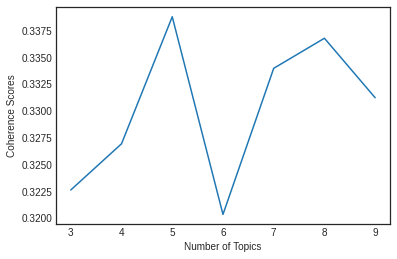

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

x = [int(i) for i in range(min_topics, max_topics)]

plt.figure()
plt.plot(x, coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Scores')
plt.show()

In [ ]:
LDAmodel = LdaModel(corpus, num_topics = 6, id2word = dictionary)
topics = LDAmodel.print_topics(num_topics = 6)
topics

INFO:gensim.models.ldamodel:using symmetric alpha at 0.16666666666666666
INFO:gensim.models.ldamodel:using symmetric eta at 0.16666666666666666
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (single-pass) LDA training, 6 topics, 1 passes over the supplied corpus of 2856 documents, updating model once every 2000 documents, evaluating perplexity every 2856 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #2000/2856
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 2000 documents
DEBUG:gensim.models.ldamodel:1707/2000 documents converged within 50 iterations
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 2000 documents into a model of 2856 documents
INFO:gensim.models.ldamodel:topic #3 (0.167): 0.026*"검색" + 0.023*"최악" + 0.021*"오류" + 0.021*"롯데" + 0.020*"가격" + 0.019*"결제" + 0.017*"상품" + 0.016*"물건"

[(0,
  '0.049*"롯데" + 0.039*"로그인" + 0.031*"닷컴" + 0.026*"짜증" + 0.026*"상품" + 0.026*"쿠폰" + 0.025*"쇼핑" + 0.024*"사용" + 0.019*"이벤트" + 0.016*"업데이트"'),
 (1,
  '0.051*"롯데" + 0.025*"닷컴" + 0.023*"주문" + 0.018*"실행" + 0.015*"먹통" + 0.012*"배송" + 0.012*"물건" + 0.011*"쇼핑" + 0.010*"중지" + 0.009*"쇼핑몰"'),
 (2,
  '0.039*"상품" + 0.038*"롯데" + 0.025*"닷컴" + 0.023*"이용" + 0.023*"화면" + 0.019*"검색" + 0.019*"오류" + 0.017*"쇼핑" + 0.017*"업데이트" + 0.014*"사용"'),
 (3,
  '0.036*"오류" + 0.025*"최악" + 0.024*"결제" + 0.017*"쇼핑" + 0.017*"배터리" + 0.015*"롯데" + 0.013*"물건" + 0.013*"수정" + 0.012*"가격" + 0.011*"상품"'),
 (4,
  '0.028*"불편" + 0.025*"건지" + 0.020*"사용" + 0.019*"쇼핑" + 0.018*"인터넷" + 0.016*"롯데" + 0.014*"연결" + 0.014*"구매" + 0.012*"번호" + 0.012*"설치"'),
 (5,
  '0.019*"검색" + 0.018*"로그인" + 0.018*"모바일" + 0.015*"상품" + 0.015*"사용" + 0.015*"고객" + 0.014*"쇼핑" + 0.014*"쿠폰" + 0.013*"포인트" + 0.012*"주문"')]

## 토픽 모델링 시각화

In [ ]:
!apt install pyLDAvis

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package pyLDAvis


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim.prepare(LDAmodel, corpus, dictionary)
vis = gensimvis.prepare(LDAmodel, corpus, dictionary)
pyLDAvis.display(vis)

DEBUG:gensim.models.ldamodel:performing inference on a chunk of 2856 documents
DEBUG:gensim.models.ldamodel:2740/2856 documents converged within 50 iterations
